In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r'C:\\Users\\hetko\\Desktop\\flight_data\\flights_done.csv')

In [3]:
df.head()

,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,DIVERTED,...,Airlines_NK,Airlines_OO,Airlines_UA,Airlines_US,Airlines_VX,Airlines_WN,AIR_ACRO_IN_NUM,DEST_AIR_ACRO_IN_NUM,DEPARTURE_TARGET,ARRIVAL_TARGET
0,4,-9,21,205,194,169,1448,4,-22,0,...,0,0,0,0,0,0,17,277,0,0
1,4,-8,12,280,279,263,2330,4,-9,0,...,0,0,0,0,0,0,176,235,1,0
2,4,-2,16,286,293,266,2296,11,5,0,...,0,0,0,1,0,0,278,66,1,1
3,4,-5,15,285,281,258,2342,8,-9,0,...,0,0,0,0,0,0,176,203,1,0
4,4,-1,11,235,215,199,1448,5,-21,0,...,0,0,0,0,0,0,277,17,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726566 entries, 0 to 5726565
Data columns (total 38 columns):
 #   Column                Dtype
---  ------                -----
 0   DAY_OF_WEEK           int64
 1   DEPARTURE_DELAY       int64
 2   TAXI_OUT              int64
 3   SCHEDULED_TIME        int64
 4   ELAPSED_TIME          int64
 5   AIR_TIME              int64
 6   DISTANCE              int64
 7   TAXI_IN               int64
 8   ARRIVAL_DELAY         int64
 9   DIVERTED              int64
 10  CANCELLED             int64
 11  AIR_SYSTEM_DELAY      int64
 12  SECURITY_DELAY        int64
 13  AIRLINE_DELAY         int64
 14  LATE_AIRCRAFT_DELAY   int64
 15  WEATHER_DELAY         int64
 16  Option_A              int64
 17  Option_B              int64
 18  Option_C              int64
 19  Option_D              int64
 20  Airlines_AA           int64
 21  Airlines_AS           int64
 22  Airlines_B6           int64
 23  Airlines_DL           int64
 24  Airlines_EV           in

In [5]:
y = df.pop('ARRIVAL_TARGET')

In [6]:
y.value_counts()

# zbior jest niezbalansowany, trzeba bedzie wprowadzic regularyzacje

0    3687672
1    2038894
Name: ARRIVAL_TARGET, dtype: int64

In [7]:
X = df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
del df, X, y

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

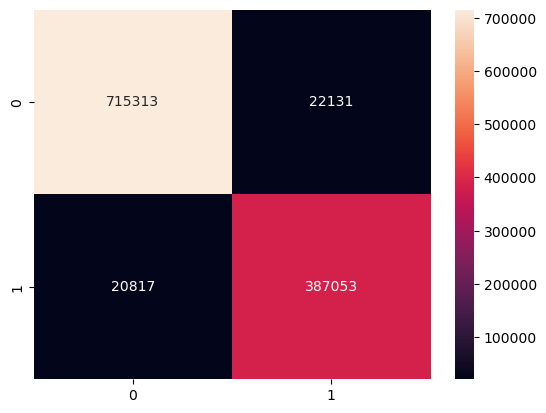

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [14]:
from sklearn.metrics import classification_report 

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    737444
           1       0.95      0.95      0.95    407870

    accuracy                           0.96   1145314
   macro avg       0.96      0.96      0.96   1145314
weighted avg       0.96      0.96      0.96   1145314



In [16]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [17]:
roc_auc_score(y_test, y_pred)

0.9594756323081154

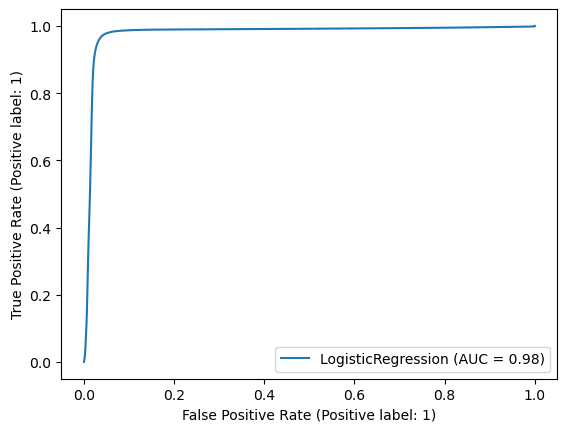

In [18]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [19]:
del model

In [20]:
# REGULARYZACJA
# model_l1 = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
# model_l1.fit(X_train, y_train)

In [22]:
from sklearn.svm import SVC

In [23]:
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(svm, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearch

In [ ]:
params = {'kernel':['linear', 'poly', 'rbf'], 
          'C':[0.001, 0.01, 0.1, 1], 
          'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

In [ ]:
searcher = GridSearch(svm, params)
searcher.fit(X_train, y_train)

In [ ]:
sercher.best_params_
sercher.best_score_

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(StandardScaler(), SVC(arg))

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeightborsClassifier 

In [ ]:
knn = KNeightborsClassifier()

In [ ]:
grid serach

In [ ]:
from sklearn.naive_bayes import MultinominalNB, GaussianNB, BernoulliNB

In [ ]:
mnb = MultinominalNB()
mnb.fit(X_train, y_train)

In [ ]:
y_pred = mnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(mnb, X_test, y_test)

In [ ]:
gb = GaussianNB()
gb.fit(X_train, y_train)

In [ ]:
y_pred = fg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(gb, X_test, y_test)

In [ ]:
bn = BernoulliNB()
bn.fit(X_train, y_train)

In [ ]:
y_pred = bn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(bn, X_test, y_test)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
disc = KBinsDiscretizer(n_bins =5,
                       encode='ordinal',
                       strategy='uniform')

In [ ]:
disc.fit(X) # pokazujemy zmienne X do disc 
X_disc = disc.transform(X) # dyskretyzujemy X
X_d = X.copy() # kopiujemy X
X_d[:] = X_disc # przypisujemy zdyskretyzowane dane
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_seed=42)

In [ ]:
wprowadzamy model

In [ ]:
disc2=KBinsDiscretizer(n_bins=3, # liczba przedziałów
                      encode='onehot', # wyświetlanie tabeli po transformacji one hot encoding
                      strategy='quantile') # tworzenie przedziałów, aby miały taką samą liczbę obserwacji

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(bn, X_test, y_test)

In [ ]:
dt.get_params()

In [ ]:
grid search

In [ ]:
from sklearn.ensemble import BaggingClassifier 

In [ ]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

In [ ]:
y_pred = bagging_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(bagging_model, X_test, y_test)

In [ ]:
from sklearn.esamble import RandomForestClassifier 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=30)
ada_model.fit(X_train, y_train)

In [ ]:
y_pred = ada_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(ada_model, X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_model.fit(X_train, y_train)

In [ ]:
y_pred = grad_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(ada_model, X_test, y_test)

In [ ]:
# REDUKCJA WYMIAROWOŚCI (ml_nienadzorowane_16.04 - PCA)
from sklear.decomposition import PCA

In [ ]:
from scipy.stats import pearsonr

In [ ]:
model = PCA()
pca_features = model.fit_transform(X)